In [2]:
### This project essentially captures a search feature for audio files.
### The following program allows you to search for a particular sound (series of sound)
### from the file you wanted to search for.

In [1]:
from scipy import fft, arange, signal
from scipy.special import logit, expit
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
from ttictoc import TicToc

In [3]:
def read_file(path):
    """
    Reads the audio .wav file and returns the sample rate and data contents of the file.
    """
    sr, signal = wavfile.read(path)
    return sr, signal[:,0]

In [98]:
sample_rate, signal = read_file("Dynoro & Gigi DAgostino - In My Mind.wav")

In [99]:
signal.max(), len(signal), len(signal)/sample_rate

(32767, 8141824, 184.62185941043083)

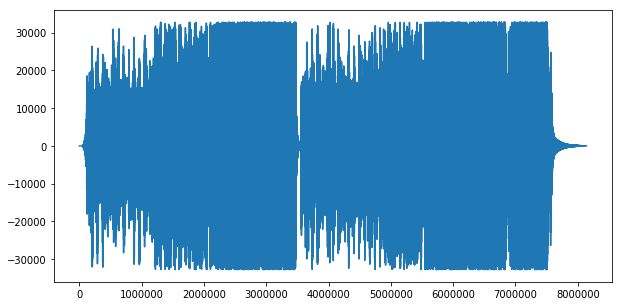

In [100]:
plt.figure(figsize=(10,5))
plt.plot(signal)

In [101]:
len(signal)/float(sample_rate)

184.62185941043083

In [102]:
def frequency_sepectrum(sf, x):
    """
    Derive frequency spectrum of a signal from time domain
    :param x: signal in the time domain
    :param sf: sampling frequency
    :returns frequencies and their content distribution
    """
    x = x - np.average(x)  # zero-centering

    n = len(x)
    k = arange(n)
    tarr = n / float(sf)
    frqarr = k / float(tarr)  # two sides frequency range

    frqarr = frqarr[range(n // 2)]  # one side frequency range

    x = fft(x) / n  # fft computing and normalization
    x = x[range(n // 2)]

    return frqarr, abs(x)

In [103]:
def plot(sample_rate, signal):
    frq, Y = frequency_sepectrum(sample_rate, signal)
    frq = frq
    Y = Y
    plt.plot(frq, Y)
    return Y, frq

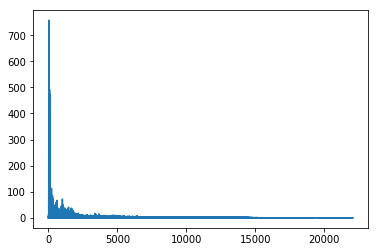

In [104]:
Y, X = plot(sample_rate, signal)

In [105]:
X.max()

22049.9945835233

In [106]:
def percent_calculator(data):
    percent = []
    pass

In [107]:
x = expit(Y)

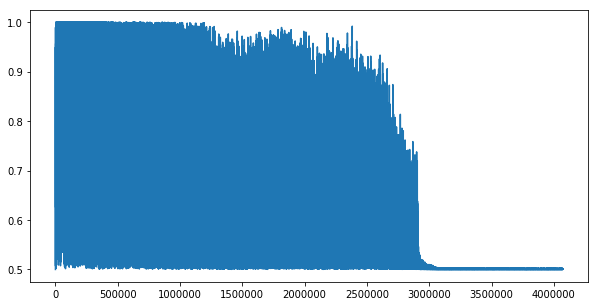

In [109]:
plt.figure(figsize=(10,5))
plt.plot(x)

In [110]:
x.shape

(4070912,)

In [111]:
pos = -1;
y = x[x.argmax():]
for i in range(len(y)):
    if(y[i] - 0.5 < 1e-6):
        pos = i
        break

In [112]:
new_x = x[:pos]

In [113]:
new_x.shape, x.shape, 6209536-4633188

((3293544,), (4070912,), 1576348)

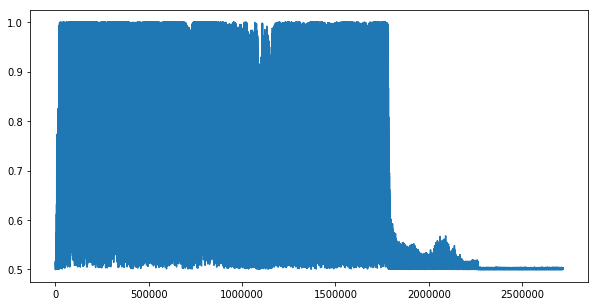

In [97]:
plt.figure(figsize=(10,5))
plt.plot(new_x)

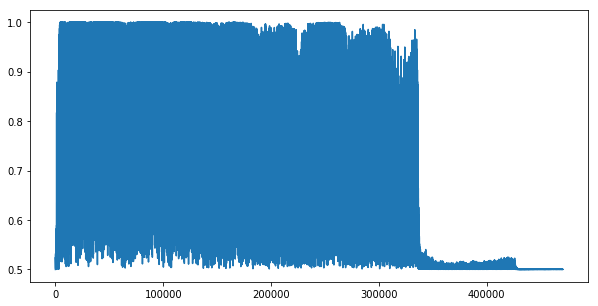

In [81]:
plt.figure(figsize=(10,5))
plt.plot(x)

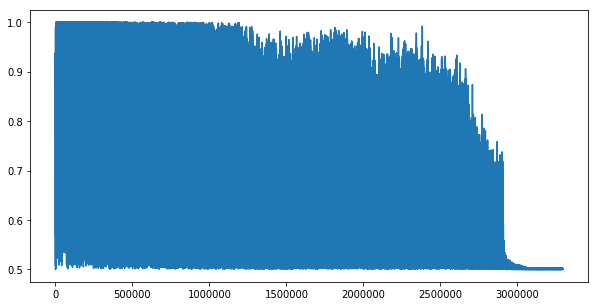

In [114]:
plt.figure(figsize=(10,5))
plt.plot(new_x)

In [ ]:
#This seems promising, return in 9hours...